<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M0.532 · Pattern Recognition</p>
<p style="margin: 0; text-align:right;">Computational Engineering and Mathematics Master</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Computers, Multimedia and Telecommunications Department</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

In this notebook, we will use another instance segmentation model, [YOLACT](https://github.com/dbolya/yolact), which is caracterized by its efficiency, allowing real-time instance segmentation in videos. The notebook is based on [this notebook](https://colab.research.google.com/github/tugstugi/dl-colab-notebooks/blob/master/notebooks/YOLACT.ipynb).

First of all, we import some basic modules and clone the github repository of YOLACT.

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/dbolya/yolact.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q --depth 1 {git_repo_url}
  !pip install -q youtube-dl
  
import sys
sys.path.append(project_name)

     |████████████████████████████████| 1.9 MB 5.4 MB/s 


Then, we download the pretrained YOLACT model.

In [ ]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=$file_id" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=$confirm_text&id=$file_id" -o $file_name
  
pretrained_model = 'yolact_resnet50_54_800000.pth'
if not exists(pretrained_model):
  download_from_google_drive('1yp7ZbbDwvMiFJEq4ptVKTYTI2VeRDXl0', pretrained_model)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2029      0 --:--:-- --:--:-- --:--:--  2029
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  121M  100  121M    0     0  48.2M      0  0:00:02  0:00:02 --:--:--  101M


We download the image that we will use for inference. We decide to use the same image as in the previous notebooks (the one we used for Mask R-CNN and DeepLabV3) to compare the results obtained with both models on the same image.

In [ ]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg

We run the YOLACT model on the given image with the eval.py script.

In [ ]:
!cd {project_name} && python eval.py --trained_model=../{pretrained_model} --score_threshold=0.3 --top_k=100 --image=../input.jpg:../output.png

Config not specified. Parsed yolact_resnet50_config from the file name.

/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
Loading model... Done.


Finally, we show the objects predicted by the model with the corresponding bouding boxes, categories and confidence scores.

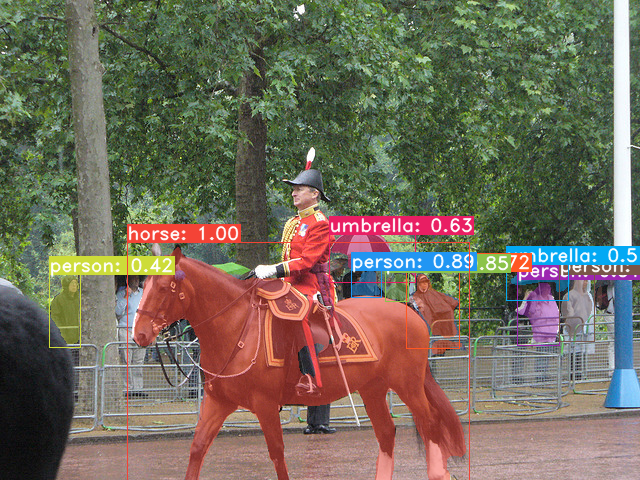

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
output_yolact = cv2.imread("./output.png")
cv2_imshow(output_yolact)